# Situación problema (Parte 3)

In [1]:
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
def setup_data():
    # import data from csv file into a dataframe
    df = pd.read_csv('nutrition-facts-week15-normalized-transformed.csv')

    # get the descriptive statistics
    print(df.describe())

    display(df)

    return df

df = setup_data()

        Calories  Carbohydrates    Protein      Sodium
count  91.000000      91.000000  91.000000   91.000000
mean   51.382697       7.688705   3.230015  274.370879
std    12.339656       1.304327   0.659678  123.163569
min    22.075100       3.984000   1.313300    6.174900
25%    45.697400       7.210800   3.122000  191.064050
50%    48.054200       7.794800   3.162700  298.875100
75%    57.929250       8.369300   3.505550  347.257950
max    84.557700      12.723600   6.263600  553.037900


,Calories,Carbohydrates,Protein,Sodium
0,61.3375,8.0656,3.3210,298.8751
1,56.5156,8.2981,3.6967,281.2446
2,60.6808,8.1841,3.5115,243.7979
3,56.6705,8.8800,3.3953,253.2294
4,57.6466,7.6791,3.4996,343.9859
...,...,...,...,...
86,47.7728,7.9780,3.1220,182.8107
87,45.6974,7.2108,3.1427,314.2868
88,45.6974,7.2108,3.1427,314.2868
89,48.0542,8.1674,3.1220,186.8209


,Calories,Carbohydrates,Protein,Sodium
Calories,1.000000,0.706149,0.812671,0.756255
Carbohydrates,0.706149,1.000000,0.638523,0.464754
Protein,0.812671,0.638523,1.000000,0.756246
Sodium,0.756255,0.464754,0.756246,1.000000


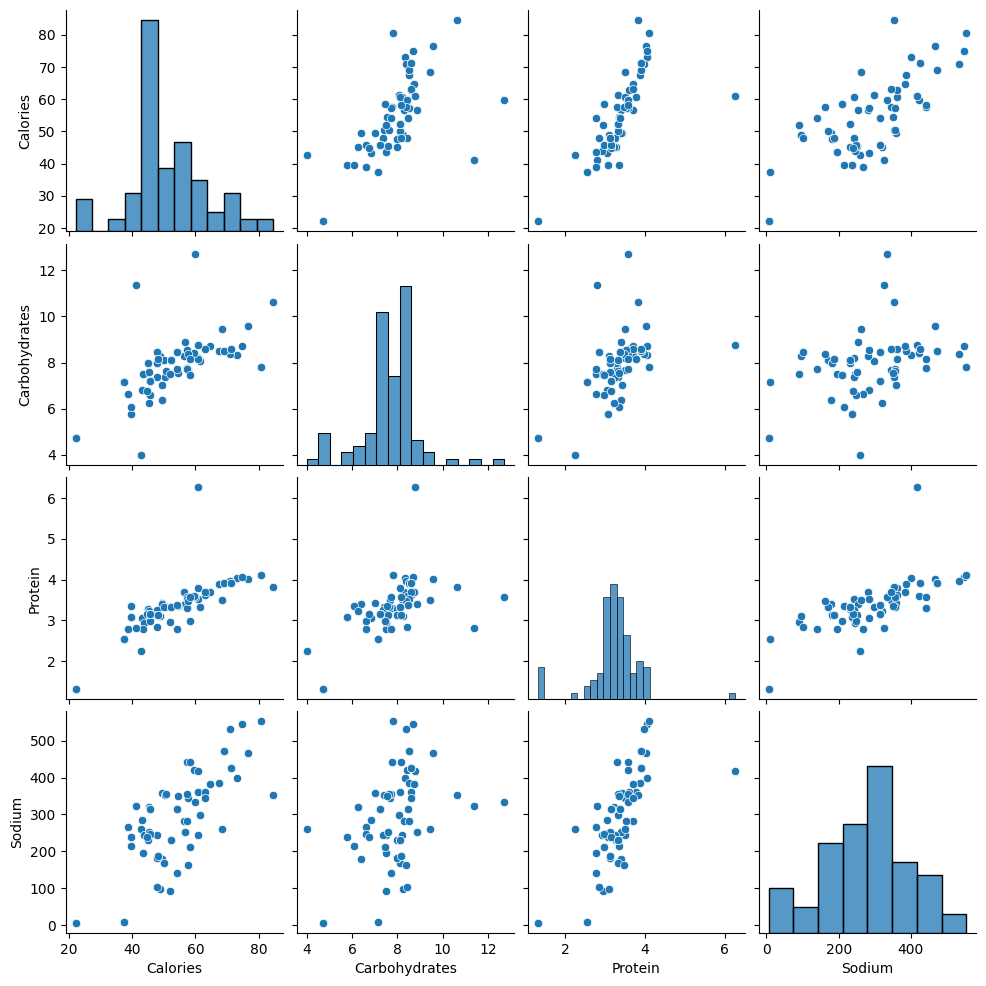

In [3]:
def numerical_data(df):
    # plot the correlation matrix of the numerical data as pairs
    sns.pairplot(df)

    # get the correlation matrix
    display(df.corr("pearson"))

numerical_data(df)

## Model 1

In [13]:
def regression(df):
    # β params model
    model = ols('Calories ~ Carbohydrates + Protein + Sodium', data=df).fit()
    print(model.summary())
    return model

model1 = regression(df)

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     97.33
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.04e-27
Time:                        13:00:30   Log-Likelihood:                -290.33
No. Observations:                  91   AIC:                             588.7
Df Residuals:                      87   BIC:                             598.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.6019      4.128     -0.630

**Interpretación:** La R-squared es buena ya qué es cercana a 0 sin embargo, si nos fijamos en la correlación entre variables tenemos que Entre proteina y sodio tienen unos valores muy altos lo cuál no es bueno para el modelo por lo tanto este modelo aún no es optimo y se debe de eliminar una de las variables en futuros modelos.

In [33]:
""" def plot_linear_regression(df):
    # only works for 2 variables at a time (x and y where y is the dependent variable)
    sns.lmplot(x='Carbohydrates', y='Calories', data=df)
    sns.lmplot(x='Protein', y='Calories', data=df)
    sns.lmplot(x='Sodium', y='Calories', data=df)

plot_linear_regression(df) """

" def plot_linear_regression(df):\n    # only works for 2 variables at a time (x and y where y is the dependent variable)\n    sns.lmplot(x='Carbohydrates', y='Calories', data=df)\n    sns.lmplot(x='Protein', y='Calories', data=df)\n    sns.lmplot(x='Sodium', y='Calories', data=df)\n\nplot_linear_regression(df) "

## model1 diagnostic

**1. Model linearity**

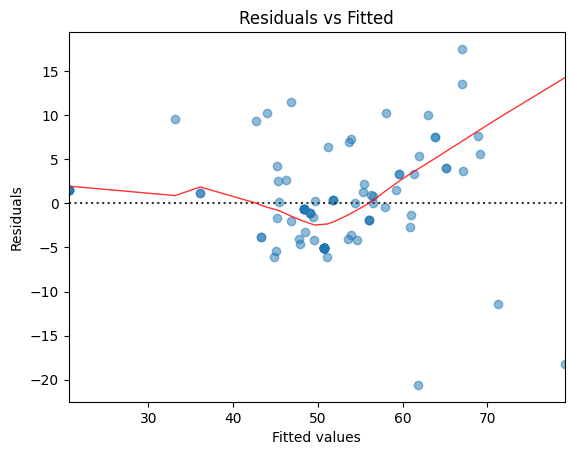

In [24]:
def model_linear(model, df):
    model_fitted_y = model.fittedvalues

    plot = sns.residplot(x=model_fitted_y, y='Calories', data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot.set(title='Residuals vs Fitted')
    plot.set(xlabel='Fitted values')
    plot.set(ylabel='Residuals')

model_linear(model1, df)

No se ve linealidad en el modelo

**2. Normality of the residues**

0     7.359187
1     0.014864
2     7.015340
3     1.274778
4     2.157498
        ...   
86   -0.647492
87   -5.026341
88   -5.026341
89   -1.089976
90    7.491656
Length: 91, dtype: float64


[('Jarque-Bera', 14.508023866799231),
 ('Chi^2 two-tail prob.', 0.0007073309242017218),
 ('Skew', -0.10603393615532729),
 ('Kurtosis', 4.944561448337337)]

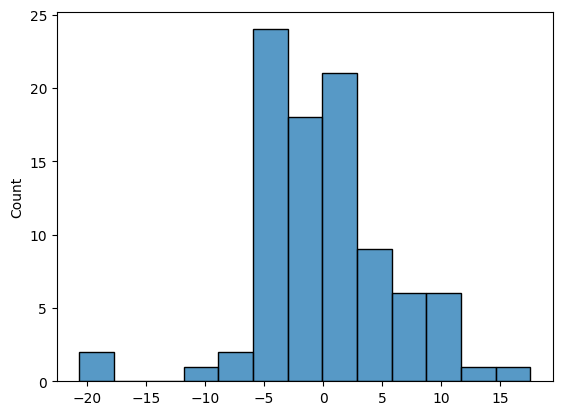

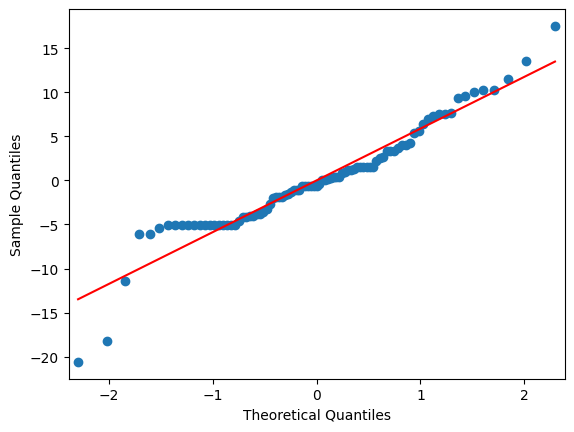

In [15]:
def residuals_normality(model):
    # get residuals from the model
    resid = model.resid
    print(resid)

    # plot the residuals
    sns.histplot(resid)

    sm.qqplot(resid, line='s')

    # get the normality test results from the residuals
    name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(resid)
    display(lzip(name, test))

residuals_normality(model1)

Los residuos deben estar cercarnos a estos valores:

* *Skew*: **0**
* *Kurtosis*: **3**

Y de hecho no se ve tan mal los resultados pero eso es solo apariencia porqué aún no están bien.

**3. Detection of influential observations
in regression**

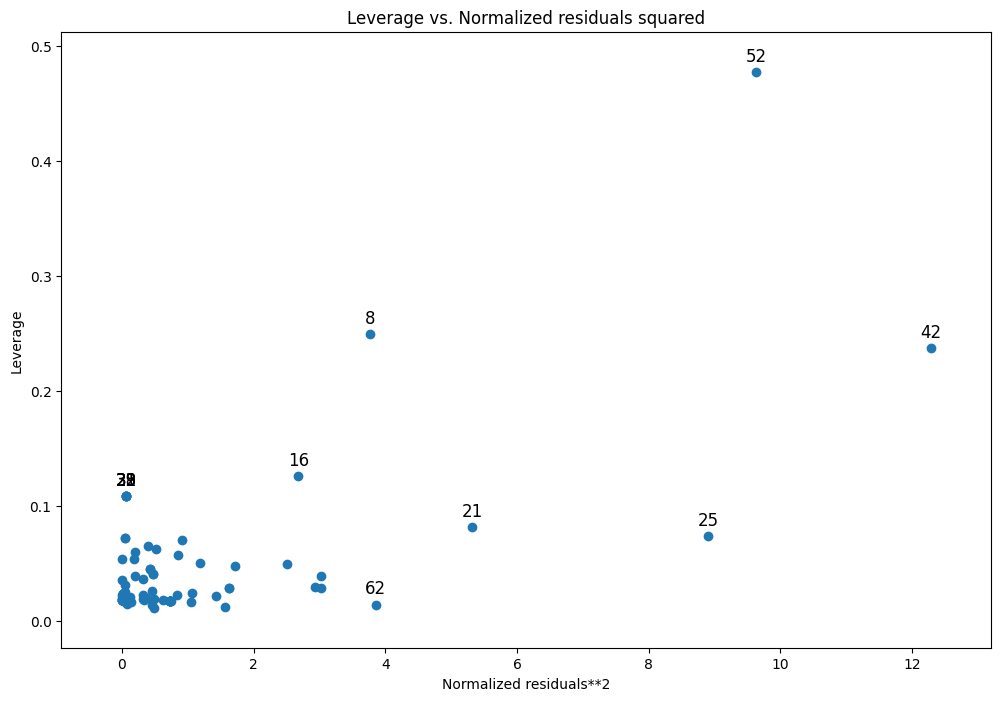

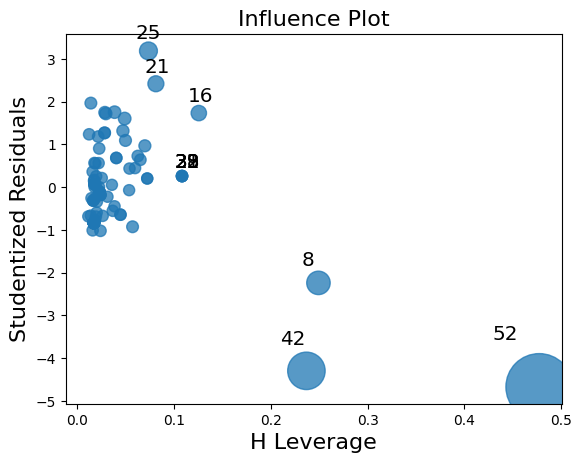

In [16]:
# get influence outliers for the regression (by big points or enumerated points)
def influence_observations(model):
    test_class = OLSInfluence(model)
    test_class.dfbetas[:5,:]
    fig, ax = plt.subplots(figsize=(12,8))
    fig = plot_leverage_resid2(model, ax = ax)

    sm.graphics.influence_plot(model, criterion="cooks")

influence_observations(model1)

Tenemos varios outliers, pero no son demasiados, por lo que podemos eliminarlos y volver a hacer el modelo.

**4. Homoscedasticity (breuschpagan test)**

In [17]:
def homoscedasticity(model):
    # work in outliners not in observations
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(model.resid, model.model.exog)
    display(lzip(name, test))

    # Ho: residuos tienen varianza constante.
    # Ha: residuos no tienen varianza constante. 
    # si alpha=0.05 y p-value=0.0009393156404089933 > alpha=> no rechaza Ho
    # por lo tanto, quiere decir que los residuos NO tienen varianza constante.

homoscedasticity(model1)

[('Lagrange multiplier statistic', 16.398707742485005),
 ('p-value', 0.0009393156404089933)]

**5. Independence of residuals (Durbin-Watson Test)**

In [18]:
def residuals_independence(model):

    print(durbin_watson(model.resid)) # sames as result table (Durbin-Watson: 1.677)

    # https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/ en (90 4 1.58893 1.72642) según la página

residuals_independence(model1)

1.6768406614404803


## model 2 diagnostic

,Calories,Carbohydrates,Protein,Sodium
0,61.3375,8.0656,3.3210,298.8751
1,56.5156,8.2981,3.6967,281.2446
2,60.6808,8.1841,3.5115,243.7979
3,56.6705,8.8800,3.3953,253.2294
4,57.6466,7.6791,3.4996,343.9859
...,...,...,...,...
79,47.7728,7.9780,3.1220,182.8107
80,45.6974,7.2108,3.1427,314.2868
81,45.6974,7.2108,3.1427,314.2868
82,48.0542,8.1674,3.1220,186.8209


                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     86.96
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.17e-25
Time:                        13:33:03   Log-Likelihood:                -269.35
No. Observations:                  84   AIC:                             546.7
Df Residuals:                      80   BIC:                             556.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3681      4.272     -0.320

[('Jarque-Bera', 11.800713506543456),
 ('Chi^2 two-tail prob.', 0.0027384676871743657),
 ('Skew', -0.03430373298933505),
 ('Kurtosis', 4.834918375855715)]

[('Lagrange multiplier statistic', 15.98331001983075),
 ('p-value', 0.0011429538247366932)]

1.8907685021019618


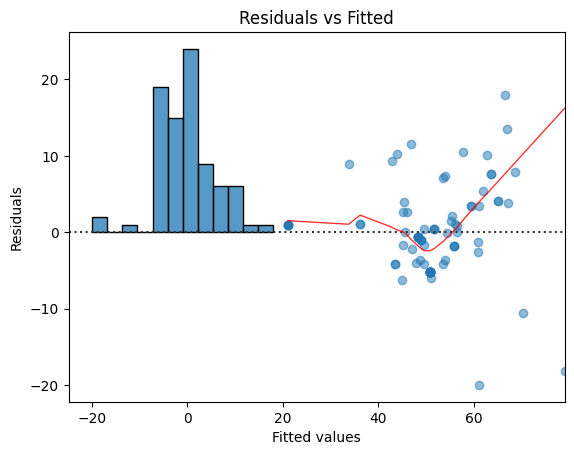

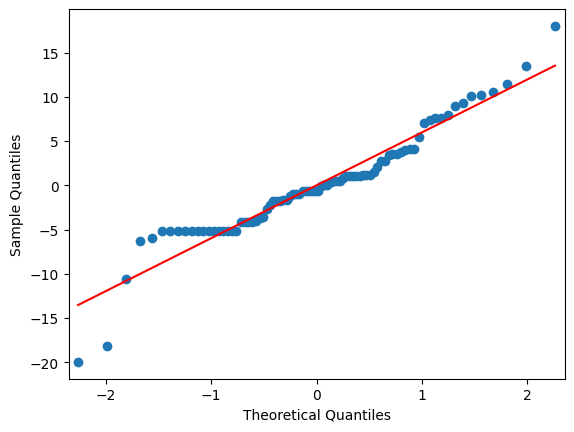

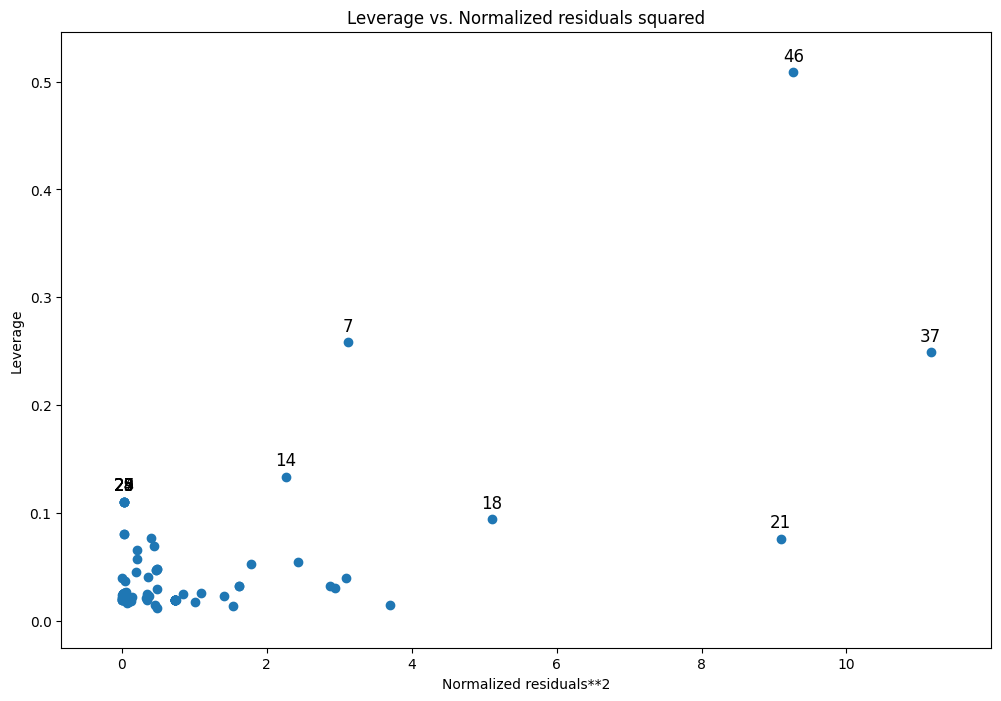

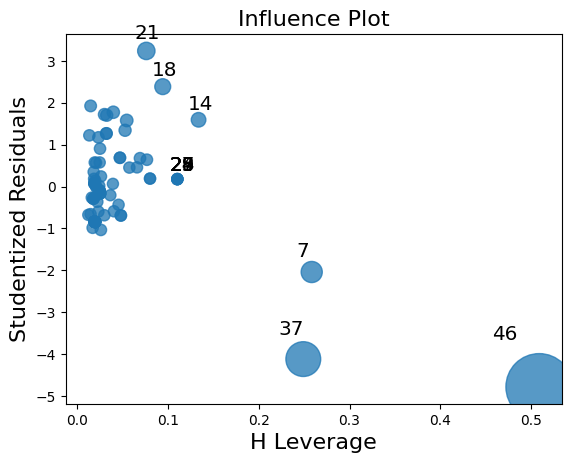

In [36]:
# remove row 7, 15, 61, 20, 24, 41, 51 from df and save into a new df
df_remove = df.drop([7, 15, 61, 20, 24, 41, 51])
# df2 to array
df_remove_array = df_remove.to_numpy()
# df2 to dataframe
df2 = pd.DataFrame(df_remove_array, columns=['Calories', 'Carbohydrates', 'Protein', 'Sodium'])
display(df2)

model2 = regression(df2)

model_linear(model2, df2)
residuals_normality(model2)
influence_observations(model2)
homoscedasticity(model2)
residuals_independence(model2)

## model3 diagsnostic

,Calories,Carbohydrates,Protein,Sodium
0,61.3375,8.0656,3.3210,298.8751
1,56.5156,8.2981,3.6967,281.2446
2,60.6808,8.1841,3.5115,243.7979
3,56.6705,8.8800,3.3953,253.2294
4,57.6466,7.6791,3.4996,343.9859
...,...,...,...,...
73,47.7728,7.9780,3.1220,182.8107
74,45.6974,7.2108,3.1427,314.2868
75,45.6974,7.2108,3.1427,314.2868
76,48.0542,8.1674,3.1220,186.8209


                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     93.06
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           4.82e-21
Time:                        13:35:02   Log-Likelihood:                -259.05
No. Observations:                  78   AIC:                             524.1
Df Residuals:                      75   BIC:                             531.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.1830      4.541     -1.362

[('Jarque-Bera', 36.252131536014765),
 ('Chi^2 two-tail prob.', 1.3426093222713715e-08),
 ('Skew', -0.11060017968962392),
 ('Kurtosis', 6.3325024249191415)]

[('Lagrange multiplier statistic', 23.866246068593128),
 ('p-value', 6.569170203401149e-06)]

2.0224514612499576


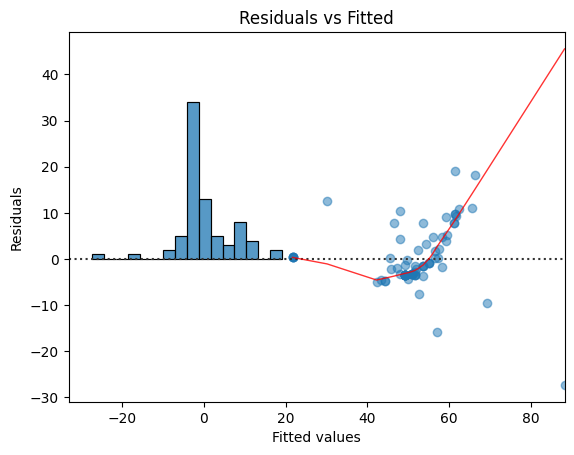

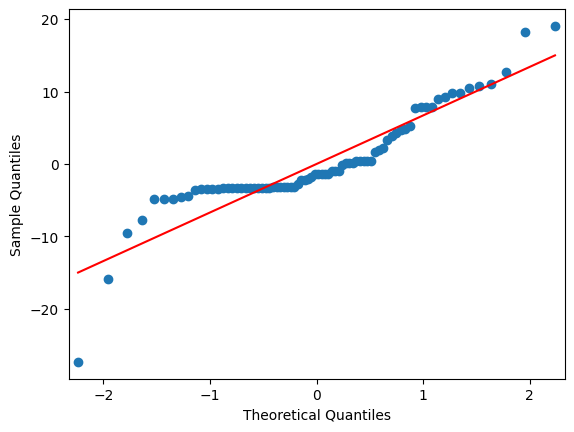

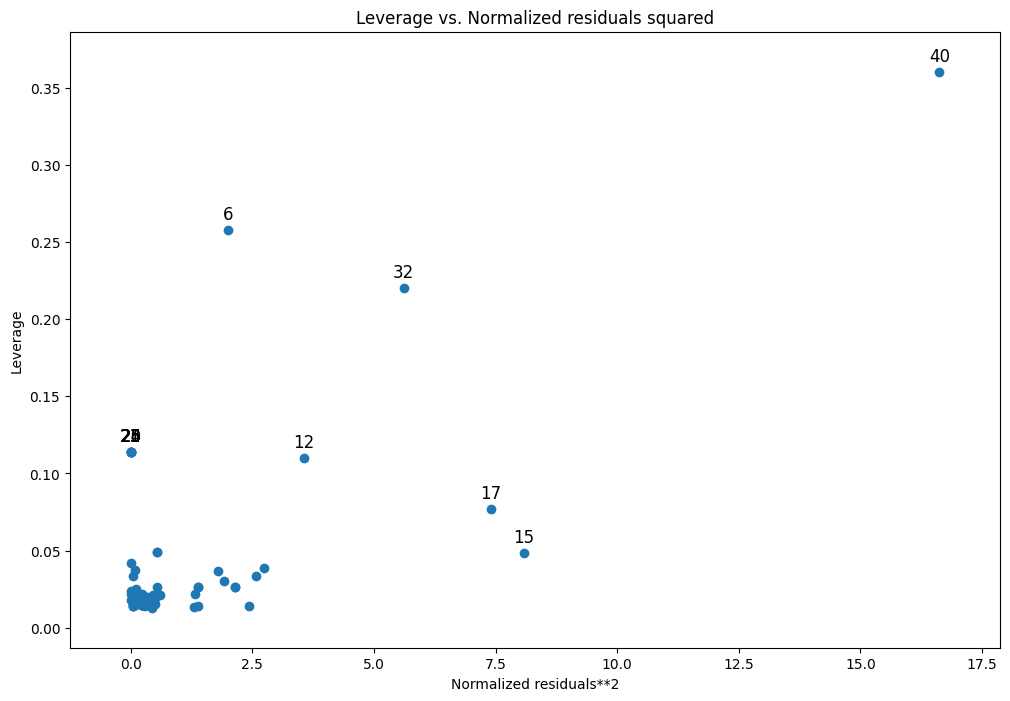

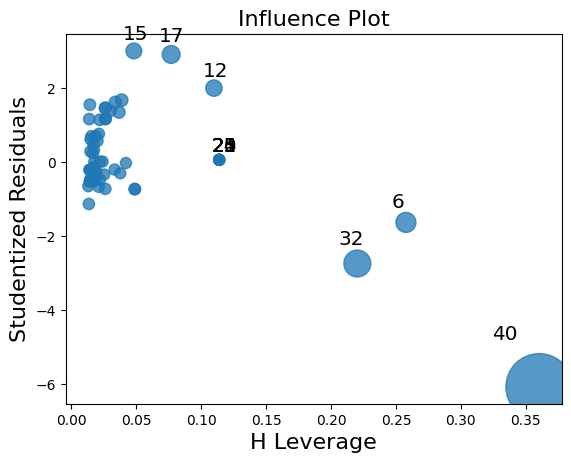

In [41]:
# remove row 6, 13, 17, 20, 36, 45 from df and save into a new df
df2_remove = df2.drop([6, 13, 17, 20, 36, 45])
# df2 to array
df2_remove_array = df2_remove.to_numpy()
# df2 to dataframe
df3 = pd.DataFrame(df2_remove_array, columns=['Calories', 'Carbohydrates', 'Protein', 'Sodium'])
display(df3)

model3 = ols('Calories ~ Carbohydrates + Protein', data=df3).fit()
print(model3.summary())

model_linear(model3, df3)
residuals_normality(model3)
influence_observations(model3)
homoscedasticity(model3)
residuals_independence(model3)

Model formula:

y = **βX0**(2.7989)/*0.716* + **βX1**(11.3987)7*1.412*

As we can see, this model is not a good model, because the R2 is very low, and the p-value of the F-test is very high, so we can not reject the null hypothesis, and we can not say that the model is a good model. Anyway, is the best model by far that we can get with this data and this variables.